# Experiments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plots
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
import glob
import os

path = r'sportsbet/binaries/log/'
all_files = glob.glob(os.path.join(path, "*.csv"))
all_tfs = pd.concat((pd.read_csv(f, sep='\t',index_col = None) for f in all_files))
all_tfs = all_tfs.reset_index(drop=True)

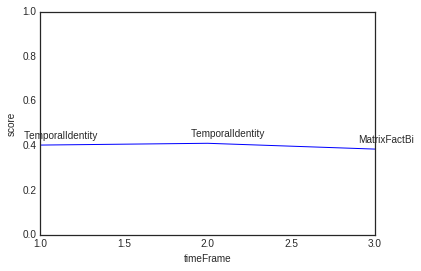

In [3]:
mod_tfs = all_tfs.groupby('timeFrame')
x = []
y = []
best_mod = []
for mtf in mod_tfs:
    last = mtf[1].groupby('modconfig').last()
    x.append(mtf[0])
    y.append(last['testPrecision'].max())
    best_mod.append(eval(last['testPrecision'].argmax()))


ax = plt.gca()
ax.plot(x,y)
plt.xlabel('timeFrame')
plt.ylabel('score')
plt.ylim([0,1])

for xi, yi in zip(x,y):    
    ax.annotate(best_mod[xi-1]['model'][:-5], xy=(xi, yi), xytext=(xi-0.1, yi+.03),
                
               )
plt.show()

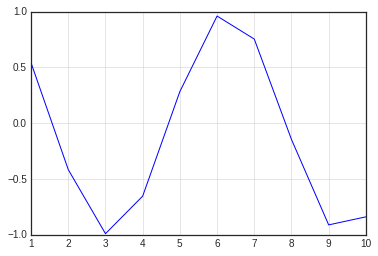

In [4]:
plt.style.use('seaborn-white')
def plot(x, y, **kwargs):
    plt.plot(x, y,**kwargs)
    plt.grid()
    plt.show()

x = np.linspace(1,10,10)    
y = np.cos(x)

plot(x,y,linewidth=1)

In [5]:
path = 'sportsbet/binaries/log/06_May_2016_15:57:38_3398.csv'
plots.plot_params(path, 30, 10, 0)

ValueError: Bad path.

## Visualisation of players in reduced space

applying PCA to see the players moving in the reduced space.

In [8]:
Z = pd.read_csv('sportsbet/binaries/log/testrepr.csv', sep='\t')
Z['z']=Z['z'].apply(lambda zi:eval(zi))
print(Z.shape)

(46273, 5)


In [9]:
players = {}
for player_id, player in Z.groupby('player'):
    z = player['z'].values
    z_mat = np.zeros((len(z), len(z[0])))
    for i, zi in enumerate(z):
        z_mat[i] = zi
    players[player_id] = z_mat

In [10]:
z = player['z'].values
X = np.zeros((len(Z), len(z[0])))
for i, zi in enumerate(Z['z'].values):
    X[i] = zi

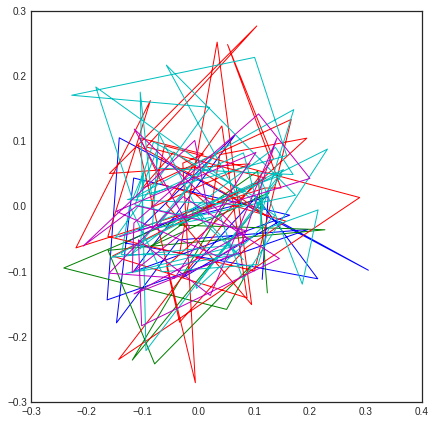

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

cntr = 1
plt.figure(figsize=(7, 7))
for j_id, p in players.iteritems():
    Xi_r = pca.transform(p)
    plt.plot(Xi_r[:,0], Xi_r[:,1])
    if cntr%5 == 0:
        break
    cntr += 1

In [30]:
players.values()[0].shape

(6, 10)

### t-SNE

In [15]:
from sklearn.manifold import TSNE
Xn = X[:300]
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_t = model.fit_transform(Xn)

In [16]:
X_list = []
i = 0
for p_id, p in players.iteritems():
    X_list.append(X_t[i:i+len(p)])
    i += len(p)

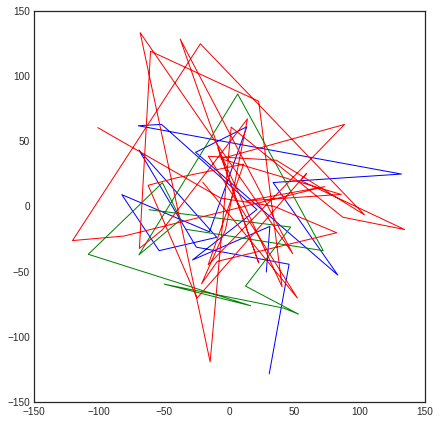

In [19]:
cntr = 1
plt.figure(figsize=(7, 7))
for x in X_list:
    plt.plot(x[:,0], x[:,1])
    if cntr%3 == 0:
        break
    cntr += 1
plt.show()

In [23]:
Z = pd.read_csv('sportsbet/binaries/log/testrepr2.csv', sep='\t')
Z['z']=Z['z'].apply(lambda zi:eval(zi))
print(Z.shape)

(46273, 5)


In [24]:
players = {}
for player_id, player in Z.groupby('player'):
    z = player['z'].values
    z_mat = np.zeros((len(z), len(z[0])))
    for i, zi in enumerate(z):
        z_mat[i] = zi
    players[player_id] = z_mat

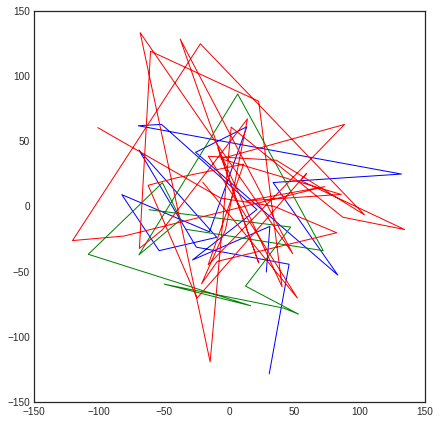

In [25]:
from sklearn.manifold import TSNE
Xn = X[:300]
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_t = model.fit_transform(Xn)
X_list = []
i = 0
for p_id, p in players.iteritems():
    X_list.append(X_t[i:i+len(p)])
    i += len(p)
cntr = 1
plt.figure(figsize=(7, 7))
for x in X_list:
    plt.plot(x[:,0], x[:,1])
    if cntr%3 == 0:
        break
    cntr += 1
plt.show()